In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winequality-red.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\Henry\AppData\Local\Temp\ipykernel_18768\1423355782.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


---

# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("="*50+" Checking NaN value "+"="*50)
print()
print(df.isnull().sum())
print()

for column in df.columns:
    print(f"Checking if any record with NaN value:")
    print(f"Checking columns {column}")
    if df[column].isnull().sum() == 0:
        print("No NaN value")
    else:
        print(f"Contain {df[column].isnull().sum()} value NaN")

print()


print("="*50+" Duplicate records "+"="*50)
print(f"{df.duplicated().sum()} records duplicated")
print("Removing duplicated records...")
if df.duplicated().sum() > 0:
    print(f"Remove {df.duplicated().sum()} records !")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicated value")

print("="*100)
print()

print("="*50+" Cheking Describe DataFrame "+"="*50)
df.describe()

================================================== Checking NaN value ==================================================

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Checking if any record with NaN value:
Checking columns fixed acidity
No NaN value
Checking if any record with NaN value:
Checking columns volatile acidity
No NaN value
Checking if any record with NaN value:
Checking columns citric acid
No NaN value
Checking if any record with NaN value:
Checking columns residual sugar
No NaN value
Checking if any record with NaN value:
Checking columns chlorides
No NaN value
Checking if any record with NaN value:
Checking columns free sulfur dioxide
No NaN value
Checking if any record with NaN value:
Checking co

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


---

<Axes: xlabel='quality', ylabel='count'>

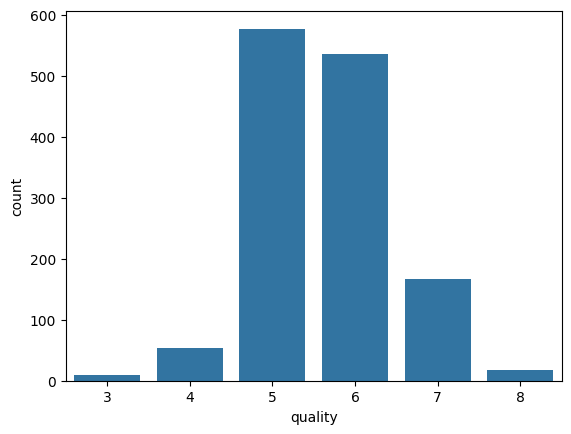

In [5]:
sns.countplot(x='quality', data=df)

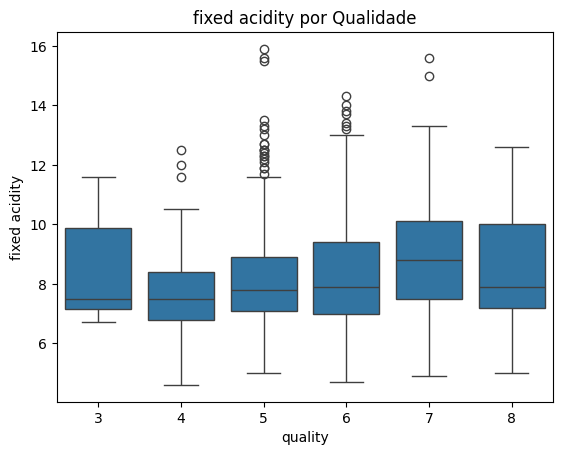

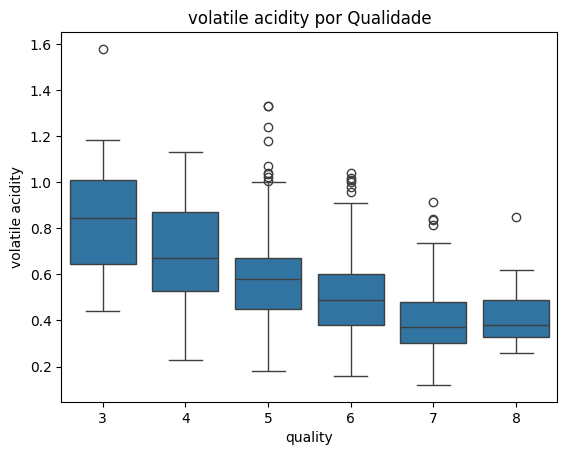

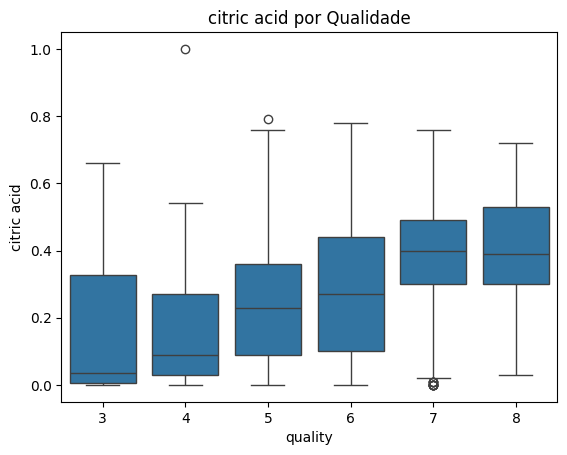

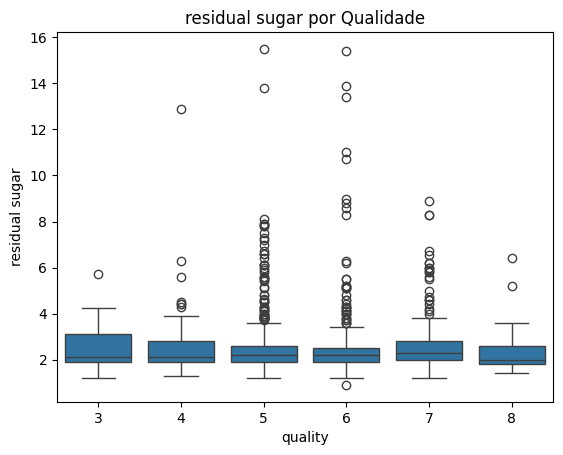

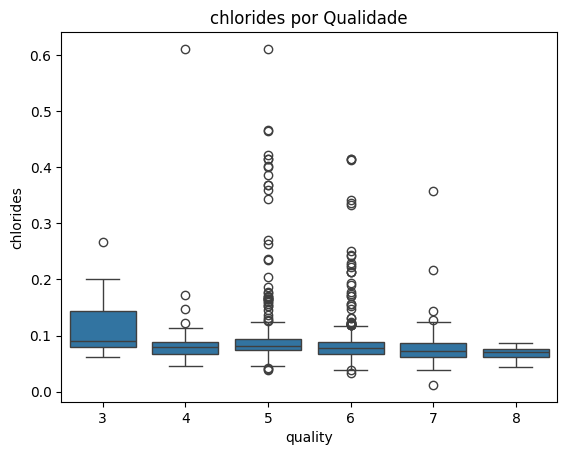

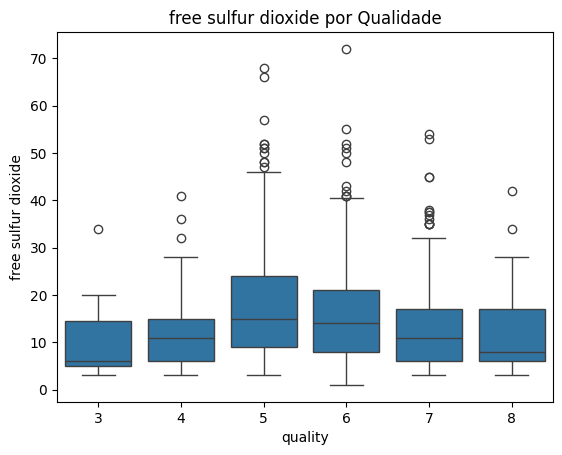

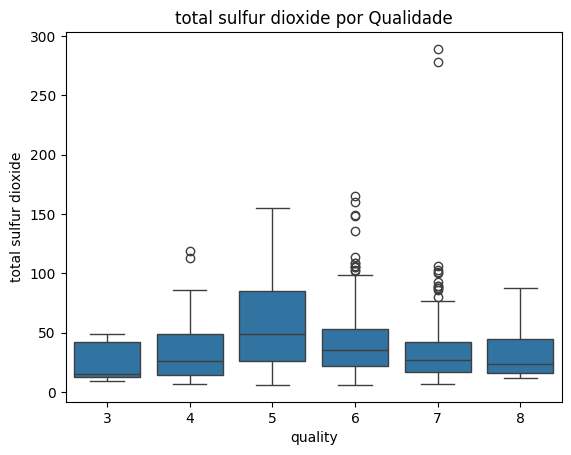

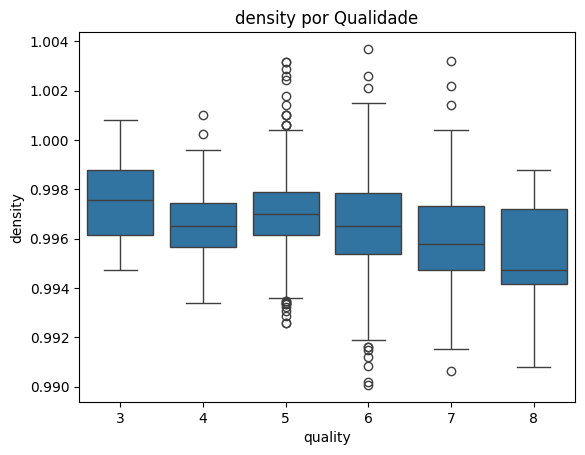

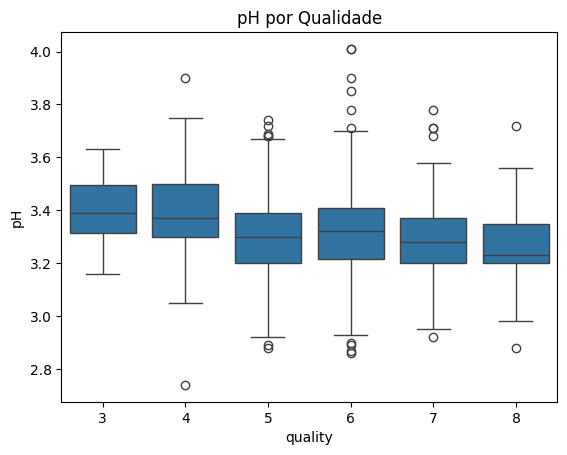

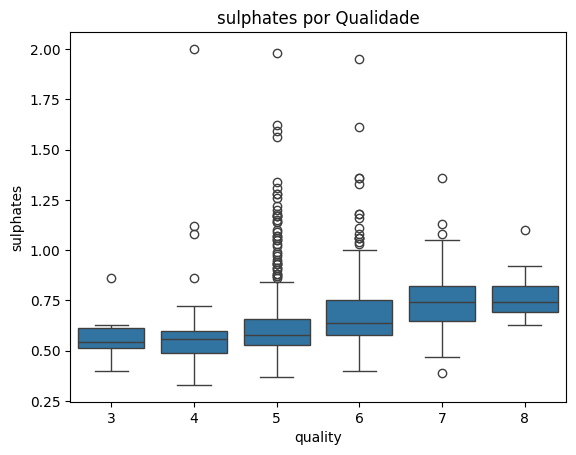

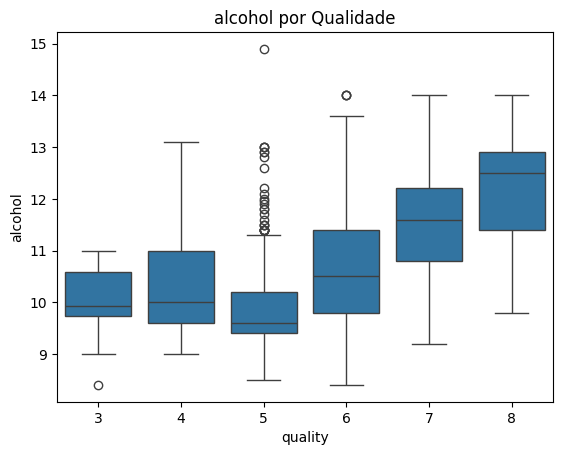

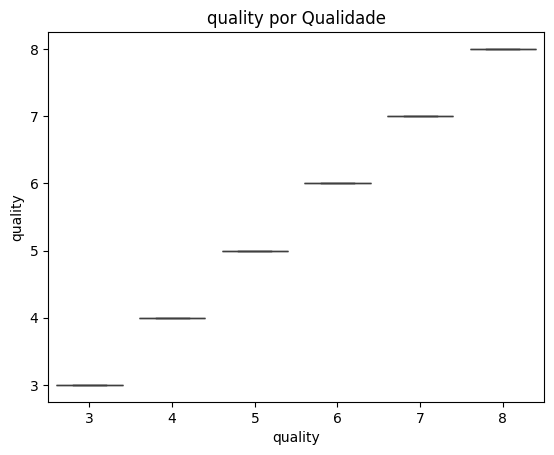

In [6]:
# Outlier Detection
for feature in df.columns:
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} por Qualidade')
    plt.show()

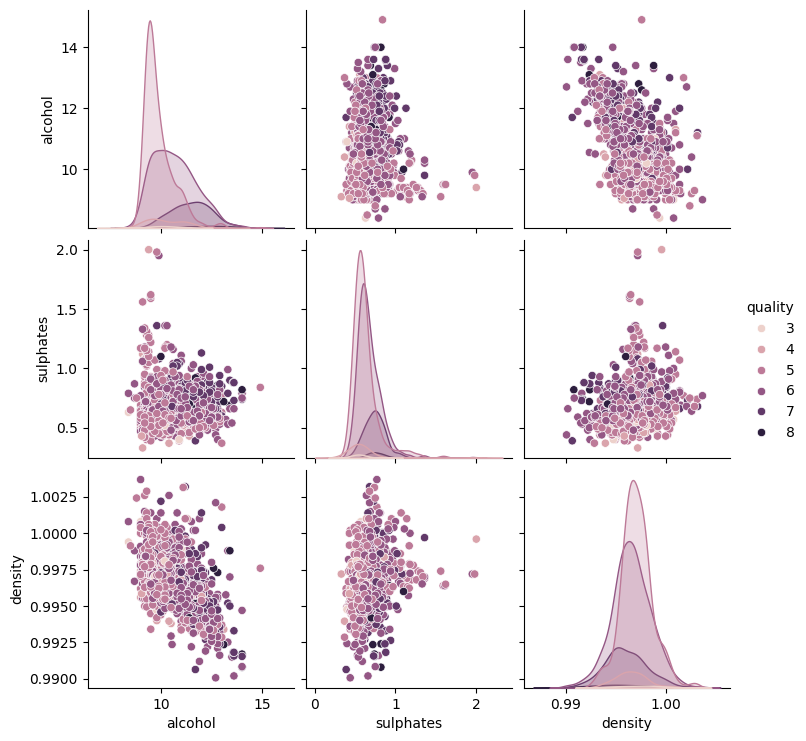

In [7]:
sns.pairplot(df, hue='quality', vars=['alcohol', 'sulphates', 'density'])
plt.show()

- Existe um desbalanceamento entre as classes, sendo `3`, `4`, `7`, `8` as minoritárias e `5` e `6` sendo a majoritária
- As classes de `quality` se sobrepõem muito, nesse caso aplicar o binning pode ser uma boa estratégia, mas podendo aumentar ainda mais o desbalanceamento de classe
- Por representar uma ordinal, podemos aplicar a regressão para depois classificar a qualidade do vinho

# Preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('quality', axis=1).values
y = df['quality'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [11]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaler = scaler_x.fit_transform(X_train)
X_test_scaler = scaler_x.transform(X_test)

y_train_scaler = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Models

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

In [13]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGB': XGBRegressor(random_state=42, verbosity=0),
    'MLP': MLPRegressor(random_state=42)
}

In [14]:
metrics = []

for name, model in models.items():
    model.fit(X_train_scaler, y_train_scaler.ravel())

    pred_scaled = model.predict(X_test_scaler)
    pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))

    rmse = root_mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 =  r2_score(y_test, pred)

    metrics.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,RMSE,MAE,R2
0,Decision Tree,0.960622,0.665441,-0.302727
1,Random Forest,0.620289,0.470551,0.456829
2,XGB,0.677435,0.511536,0.352137
3,MLP,0.684485,0.515016,0.338581


- Um R² negativo indica que o modelo de regressão está desempenhando pior do que simplesmente prever a média dos valores do alvo

# Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
metrics_tuning = []

param_grid_models = {
    'Decision Tree': { 
        'max_depth': [3, 5, 7, 10, 15], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4]
    },

    'Random Forest': { 
        'n_estimators': [50, 100, 200, 300, 500], 
        'max_depth': [5, 10, 15], 
        'min_samples_split': [2, 5], 
        'min_samples_leaf': [1, 2], 
        'max_features': ['sqrt', 'log2']
    },

    'XGB': { 
        'n_estimators': [50, 100, 200, 300, 500], 
        'max_depth': [3, 5, 7, 9], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'subsample': [0.8, 1], 
        'colsample_bytree': [0.8, 1]
    },

    'MLP': { 
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.1],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [500, 600, 700]
    }
}

for name, params in param_grid_models.items():
    print(f"Train and Tuning model: {name}")
    model = models[name]

    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    grid.fit(X_train_scaler, y_train_scaler.ravel()) 

    tuned_model = grid.best_estimator_

    tuned_model.fit(X_train_scaler, y_train_scaler.ravel())

    print(f"Find Best Model: {grid.best_estimator_}")

    pred_scaled = tuned_model.predict(X_test_scaler)
    pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))

    rmse = root_mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 =  r2_score(y_test, pred)

    metrics_tuning.append({
        'Model': name,
        'Best Estimator': grid.best_estimator_,
        'Best Param': grid.best_params_,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    print('-' * 50)

metrics_tuning_df = pd.DataFrame(metrics_tuning)

Train and Tuning model: Decision Tree
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Find Best Model: DecisionTreeRegressor(max_depth=3, random_state=42)
Decision Tree - RMSE: 0.6828, MAE: 0.5138, R²: 0.3418
--------------------------------------------------
Train and Tuning model: Random Forest
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Find Best Model: RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500,
                      random_state=42)
Random Forest - RMSE: 0.6181, MAE: 0.4685, R²: 0.4607
--------------------------------------------------
Train and Tuning model: XGB
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Find Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_w

In [17]:
metrics_tuning_df

,Model,Best Estimator,Best Param,RMSE,MAE,R2
0,Decision Tree,"DecisionTreeRegressor(max_depth=3, random_stat...","{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.682804,0.513778,0.341826
1,Random Forest,"(DecisionTreeRegressor(max_depth=15, max_featu...","{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.618062,0.468523,0.460723
2,XGB,"XGBRegressor(base_score=None, booster=None, ca...","{'colsample_bytree': 1, 'learning_rate': 0.01,...",0.604865,0.464977,0.483505
3,MLP,"MLPRegressor(activation='tanh', alpha=0.1, max...","{'activation': 'tanh', 'alpha': 0.1, 'hidden_l...",0.653156,0.503848,0.397742


In [18]:
metrics_df

,Model,RMSE,MAE,R2
0,Decision Tree,0.960622,0.665441,-0.302727
1,Random Forest,0.620289,0.470551,0.456829
2,XGB,0.677435,0.511536,0.352137
3,MLP,0.684485,0.515016,0.338581


# Stacking

- Combinar vários modelos para geração de um modelo final

In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

In [20]:
base_models = [
    ('decision_tree', metrics_tuning_df['Best Estimator'][0]),
    ('random_forest', metrics_tuning_df['Best Estimator'][1]),
    ('xgboost', metrics_tuning_df['Best Estimator'][2])
]

final_model = Ridge(alpha=1.0)

stacking = StackingRegressor(estimators=base_models, final_estimator=final_model, cv=5, n_jobs=-1)

stacking.fit(X_train_scaler, y_train_scaler.ravel())

pred_scaled = stacking.predict(X_test_scaler)
pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))

rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

metrics_staking = pd.DataFrame([{'Model': 'Stacking', 'Best Estimator': '-', 'Best Param': '-', 'RMSE': rmse, 'MAE': mae, 'R2': r2}])

metrics_tuning_df = pd.concat([metrics_tuning_df, metrics_staking], ignore_index=True)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 0.6123198660320567, MAE: 0.4677586152887186, R²: 0.47069596070977604


In [21]:
metrics_tuning_df

,Model,Best Estimator,Best Param,RMSE,MAE,R2
0,Decision Tree,"DecisionTreeRegressor(max_depth=3, random_stat...","{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.682804,0.513778,0.341826
1,Random Forest,"(DecisionTreeRegressor(max_depth=15, max_featu...","{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.618062,0.468523,0.460723
2,XGB,"XGBRegressor(base_score=None, booster=None, ca...","{'colsample_bytree': 1, 'learning_rate': 0.01,...",0.604865,0.464977,0.483505
3,MLP,"MLPRegressor(activation='tanh', alpha=0.1, max...","{'activation': 'tanh', 'alpha': 0.1, 'hidden_l...",0.653156,0.503848,0.397742
4,Stacking,-,-,0.612320,0.467759,0.470696


- `Random Forest` e `Stacking` obteve as melhores métricas

# Final Model

In [23]:
import joblib

joblib.dump(stacking, 'final_model_stacking_regressor.joblib')
joblib.dump(scaler_x, 'scaler_x.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

['scaler_y.joblib']